In [31]:
pip install pandas numpy matplotlib seaborn scipy scikit-learn

  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.7 MB 1.7 MB/s eta 0:00:07
   -- ------------------------------------- 0.8/10.7 MB 1.5 MB/s eta 0:00:07
   ---- ----------------------------------- 1.3/10.7 MB 1.6 MB/s eta 0:00:06
   ---- ----------------------------------- 1.3/10.7 MB 1.6 MB/s eta 0:00:06
   ----- ---------------------------------- 1.6/10.7 MB 1.4 MB/s eta 0:00:07
   ------ --------------------------------- 1.8/10.7 MB 1.4 MB/s eta 0:00:07
   ------- -------------------------------- 2.1/10.7 MB 1.3 MB/s eta 0:00:07
   -------- ------------------------------- 2.4/10.7 MB 1.3 MB/s eta 0:00:07
   --------- ------------------------------ 2.6/10.7 MB 1.3 MB/s eta 0:00:07
   --------- ----------------------


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Pemeriksaan Awal Dataset

In [23]:
#Import Library Yang Dibutuhkan 
import pandas as pd 
import matplotlib.pyplot as plt  

#Import Data
df = pd.read_csv('StudentsPerformance.csv') 

#Lihat sample data dan Info data 
print('Sample 5 data teratas :\n',df.head())
print(20*'**')
print('Info data :\n',df.info())
print(20*'**','\n\n')


Sample 5 data teratas :
    gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 

In [ ]:
# Pembersihan Data (Cleaning)

In [24]:
print('Cek Jumlah Missing Value pada setiap kolom :\n',df.isna().sum())
print(20*'**') 
# Lihat Jumlah Duplicated Data 
print('Jumlah Duplicated data :\n',df.duplicated().sum())

Cek Jumlah Missing Value pada setiap kolom :
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
****************************************
Jumlah Duplicated data :
 0


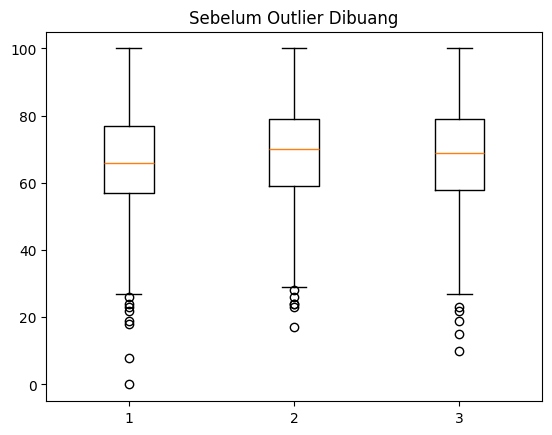

Jumlah Baris Sebelum Outlier dibuang: 1000
****************************************


In [25]:
kolom_numerik = ['math score','reading score','writing score'] 
plt.boxplot(df[kolom_numerik])
plt.title('Sebelum Outlier Dibuang')
plt.show()  

# Data Sebelum dibuang outliernya 
print(f'Jumlah Baris Sebelum Outlier dibuang: {df.shape[0]}') 
print(20*'**')

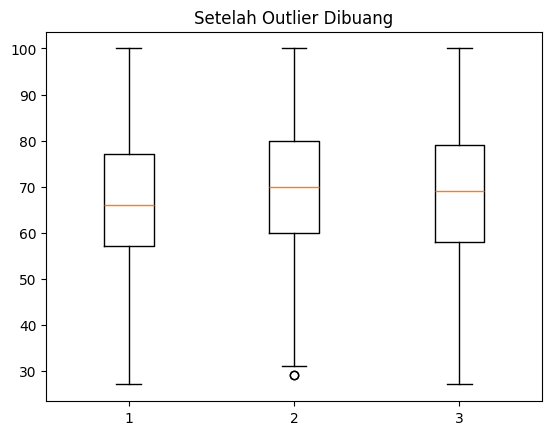

Jumlah Baris setelah outlier dibuang: 988


In [26]:
# Q1, Q3, dan IQR
Q1 = df[kolom_numerik].quantile(0.25)
Q3 = df[kolom_numerik].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[kolom_numerik] < (Q1 - 1.5 * IQR)) | (df[kolom_numerik] > (Q3 + 1.5 * IQR))).any(axis=1)]

#Cek outlier setelah dibuang
plt.boxplot(df[kolom_numerik])
plt.title('Setelah Outlier Dibuang')
plt.show() 
print(f'Jumlah Baris setelah outlier dibuang: {df.shape[0]}') 

In [27]:
# Menghapus kolom yang tidak diperlukan
df = df.drop(columns=['race/ethnicity', 'lunch', 'test preparation course'])

# Membuat Kolom baru bernama 'final score' setelah penghapusan kolom
df['final score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Menampilkan data setelah kolom baru ditambahkan
print('Data Setelah ditambah kolom baru:', df.head())

# Save data yang sudah bersih
df.to_csv('1_peforma_cleaned.csv', index=False)

Data Setelah ditambah kolom baru:    gender parental level of education  math score  reading score  \
0  female           bachelor's degree          72             72   
1  female                some college          69             90   
2  female             master's degree          90             95   
3    male          associate's degree          47             57   
4    male                some college          76             78   

   writing score  final score  
0             74    72.666667  
1             88    82.333333  
2             93    92.666667  
3             44    49.333333  
4             75    76.333333  


In [ ]:
# Normalisasi Data

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('1_peforma_cleaned.csv')

# Kolom numerik yang perlu dinormalisasi
kolom_numerik = ['math score', 'reading score', 'writing score']

# Membuat objek StandardScaler
scaler = StandardScaler()

# Melakukan normalisasi pada kolom numerik
df[kolom_numerik] = scaler.fit_transform(df[kolom_numerik])

# Menampilkan data setelah normalisasi
print(df.head())

   gender parental level of education  math score  reading score  \
0  female           bachelor's degree    0.373174       0.168406   
1  female                some college    0.164871       1.453233   
2  female             master's degree    1.622992       1.810130   
3    male          associate's degree   -1.362684      -0.902283   
4    male                some college    0.650912       0.596682   

   writing score  final score  
0       0.374241    72.666667  
1       1.338567    82.333333  
2       1.682969    92.666667  
3      -1.692172    49.333333  
4       0.443121    76.333333  


In [ ]:
# encoding

In [33]:
from sklearn.preprocessing import LabelEncoder

# Kolom kategorikal yang perlu di-encode
kolom_kategorikal = ['parental level of education']

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan Label Encoding pada kolom kategorikal
for kolom in kolom_kategorikal:
    df[kolom] = label_encoder.fit_transform(df[kolom])

# Menampilkan data setelah encoding
print(df.head())

   gender  parental level of education  math score  reading score  \
0  female                            1    0.373174       0.168406   
1  female                            4    0.164871       1.453233   
2  female                            3    1.622992       1.810130   
3    male                            0   -1.362684      -0.902283   
4    male                            4    0.650912       0.596682   

   writing score  final score  
0       0.374241    72.666667  
1       1.338567    82.333333  
2       1.682969    92.666667  
3      -1.692172    49.333333  
4       0.443121    76.333333  
